In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from IPython.display import display, HTML

OI élevé = niveau où beaucoup de traders ont des paris ouverts.

Cela agit comme un niveau magnétique ou défensif :

Si le prix s’en approche → volatilité potentielle.

Si le prix casse ce niveau → accélération ou squeeze possible.

In [ ]:
import yfinance as yf
import pandas as pd

# Récupérer les données du QQQ
ticker = yf.Ticker("QQQ")

# Sélection de la date d’expiration la plus proche
expiration = ticker.options[0]

# Récupérer la chaîne d'options
opt_chain = ticker.option_chain(expiration)
calls = opt_chain.calls
puts = opt_chain.puts

# Trier par open interest décroissant
top_calls = calls.sort_values(by='openInterest', ascending=False).head(20)
top_puts = puts.sort_values(by='openInterest', ascending=False).head(20)

# Sélection des colonnes à afficher
calls_df = top_calls[["strike", "impliedVolatility", "openInterest", "volume"]].copy()
puts_df = top_puts[["strike", "impliedVolatility", "openInterest", "volume"]].copy()

# Affichage dans deux tableaux côte à côte
display(HTML("<h3>📈 Top 20 Calls par Open Interest</h3>"))
display(calls_df)

display(HTML("<h3>📉 Top 20 Puts par Open Interest</h3>"))
display(puts_df)


,strike,impliedVolatility,openInterest,volume
137,590.0,0.531255,6166,NaN
76,500.0,0.577397,3786,450.0
96,520.0,0.143929,2296,35924.0
134,570.0,0.414068,1959,2.0
101,525.0,0.139047,1705,15542.0
80,504.0,0.516118,1615,55.0
106,530.0,0.148202,1586,9215.0
94,518.0,0.172127,1390,6495.0
116,540.0,0.205086,1304,1930.0
95,519.0,0.148324,1163,21724.0


,strike,impliedVolatility,openInterest,volume
63,475.0,0.472662,5010,94.0
68,480.0,0.421881,3817,197.0
98,510.0,0.188973,3248,10922.0
0,400.0,1.093755,2899,282.0
88,500.0,0.251961,2392,7970.0
103,515.0,0.170418,2327,13828.0
85,497.0,0.273445,2257,1646.0
105,517.0,0.162606,2110,13642.0
83,495.0,0.292976,1993,718.0
78,490.0,0.343757,1992,938.0


In [ ]:
# Fonction de conversion QQQ -> NQ
def qqq_strike_to_nq(strike, factor=41.0):
    return strike * factor

# Récupération des données
ticker = yf.Ticker("QQQ")
expiration = ticker.options[0]
opt_chain = ticker.option_chain(expiration)
calls = opt_chain.calls
puts = opt_chain.puts

# Regrouper les open interest par strike
call_oi = calls.groupby("strike")["openInterest"].sum()
put_oi = puts.groupby("strike")["openInterest"].sum()

# Combiner call et put OI
combined_oi = pd.DataFrame({
    "call_OI": call_oi,
    "put_OI": put_oi
}).fillna(0)

# Total OI
combined_oi["total_OI"] = combined_oi["call_OI"] + combined_oi["put_OI"]

# Convertir les strikes en niveaux équivalents NQ
combined_oi["NQ_equivalent"] = combined_oi.index * 41.0

# Trier par total open interest
combined_sorted = combined_oi.sort_values(by="total_OI", ascending=False).head(30)

# Réorganiser les colonnes pour plus de clarté
combined_sorted = combined_sorted[["NQ_equivalent", "call_OI", "put_OI", "total_OI"]]

# Affichage
from IPython.display import display, HTML
display(HTML("<h3>🔥 Niveaux Projetés sur le Futures NQ à partir des Options QQQ (OI cumulés)</h3>"))
display(combined_sorted)


,NQ_equivalent,call_OI,put_OI,total_OI
strike,,,,
500.0,20500.0,3786.0,2392.0,6178.0
590.0,24190.0,6166.0,0.0,6166.0
475.0,19475.0,41.0,5010.0,5051.0
480.0,19680.0,101.0,3817.0,3918.0
510.0,20910.0,505.0,3248.0,3753.0
520.0,21320.0,2296.0,1259.0,3555.0
515.0,21115.0,1006.0,2327.0,3333.0
517.0,21197.0,934.0,2110.0,3044.0
400.0,16400.0,1.0,2899.0,2900.0


🟩 Long Gamma : zones de stabilité (les market makers absorbent le mouvement).

🟥 Short Gamma : zones de risque de squeeze (les market makers amplifient le mouvement).

🔵 Ligne bleue : le niveau de Max Pain projeté sur le contrat futures NQ (aimant à prix souvent à l'expiration).

,QQQ_Strike,NQ_Equivalent,Total_OI,Gamma_Exposure,Distance_to_MaxPain,Gamma_Type
88,512.0,20992.0,2436,2436.000000,0.0,Long Gamma
86,510.0,20910.0,3753,1251.000000,2.0,Long Gamma
89,513.0,21033.0,1759,879.500000,1.0,Long Gamma
91,515.0,21115.0,3333,833.250000,3.0,Long Gamma
87,511.0,20951.0,1058,529.000000,1.0,Long Gamma
93,517.0,21197.0,3044,507.333333,5.0,Long Gamma
92,516.0,21156.0,2413,482.600000,4.0,Long Gamma
90,514.0,21074.0,1370,456.666667,2.0,Long Gamma
96,520.0,21320.0,3555,395.000000,8.0,Long Gamma
94,518.0,21238.0,2630,375.714286,6.0,Long Gamma


,QQQ_Strike,NQ_Equivalent,Total_OI,Gamma_Exposure,Distance_to_MaxPain,Gamma_Type
76,500.0,20500.0,6178,475.230769,12.0,Short Gamma
71,495.0,20295.0,2816,156.444444,17.0,Short Gamma
73,497.0,20377.0,2436,152.250000,15.0,Short Gamma
101,525.0,21525.0,1990,142.142857,13.0,Short Gamma
51,475.0,19475.0,5051,132.921053,37.0,Short Gamma
100,524.0,21484.0,1563,120.230769,12.0,Short Gamma
56,480.0,19680.0,3918,118.727273,32.0,Short Gamma
66,490.0,20090.0,2566,111.565217,22.0,Short Gamma
98,522.0,21402.0,1038,94.363636,10.0,Short Gamma
69,493.0,20213.0,1719,85.950000,19.0,Short Gamma


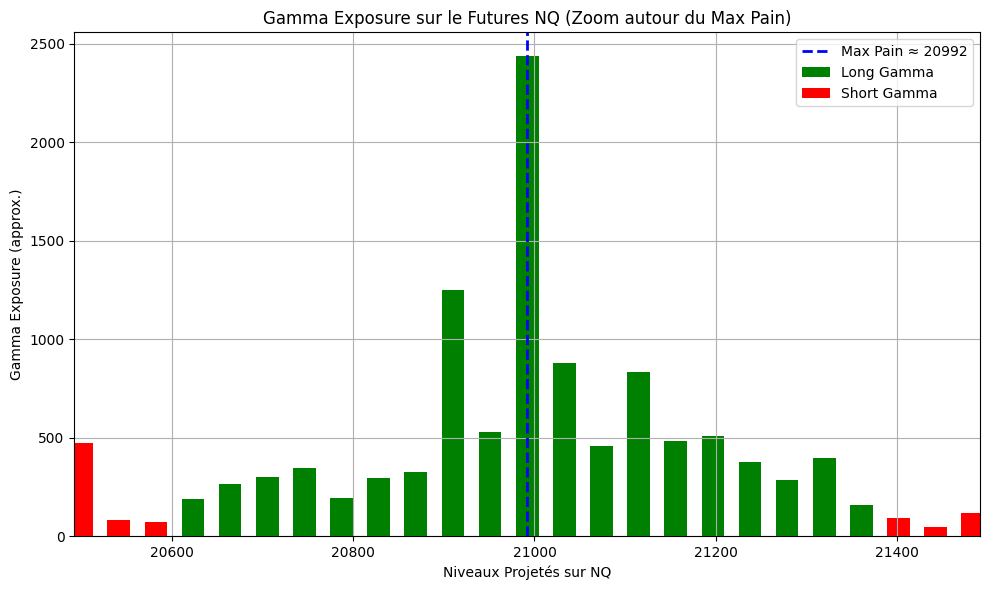

In [ ]:
# Récupération des données QQQ
ticker = yf.Ticker("QQQ")
expiration = ticker.options[0]
opt_chain = ticker.option_chain(expiration)
calls = opt_chain.calls
puts = opt_chain.puts

# Strikes communs
common_strikes = sorted(set(calls['strike']).intersection(set(puts['strike'])))
call_oi = calls.set_index('strike').reindex(common_strikes)['openInterest'].fillna(0).values
put_oi = puts.set_index('strike').reindex(common_strikes)['openInterest'].fillna(0).values
strikes = np.array(common_strikes)

# Calcul du Max Pain
total_loss = []
for s in strikes:
    call_loss = np.sum(np.maximum(s - strikes, 0) * call_oi)
    put_loss = np.sum(np.maximum(strikes - s, 0) * put_oi)
    total_loss.append(call_loss + put_loss)

min_loss_index = np.argmin(total_loss)
max_pain_strike = strikes[min_loss_index]
max_pain_nq = max_pain_strike * 41

# Gamma Exposure Approx
total_oi = call_oi + put_oi
distance = np.abs(strikes - max_pain_strike)
gamma_exposure = total_oi / (1 + distance)

gamma_df = pd.DataFrame({
    'QQQ_Strike': strikes,
    'NQ_Equivalent': strikes * 41.0,
    'Total_OI': total_oi,
    'Gamma_Exposure': gamma_exposure,
    'Distance_to_MaxPain': distance
})

gamma_df['Gamma_Type'] = gamma_df['Distance_to_MaxPain'].apply(
    lambda x: 'Short Gamma' if x >= 10 else 'Long Gamma'
)

# Séparer pour affichage
long_gamma = gamma_df[gamma_df['Gamma_Type'] == 'Long Gamma']
short_gamma = gamma_df[gamma_df['Gamma_Type'] == 'Short Gamma']

# -------------------- AFFICHAGE TABLEAUX --------------------
display(HTML(f"<h3>🎯 Max Pain QQQ : {max_pain_strike} → NQ ≈ {int(max_pain_nq)}</h3>"))

display(HTML("<h4>🟩 Top 10 Long Gamma Levels</h4>"))
display(long_gamma.sort_values(by="Gamma_Exposure", ascending=False).head(10))

display(HTML("<h4>🟥 Top 10 Short Gamma Levels</h4>"))
display(short_gamma.sort_values(by="Gamma_Exposure", ascending=False).head(10))

# -------------------- GRAPHIQUE --------------------
# Limiter la plage horizontale à ±500 autour du max pain
x_min = max_pain_nq - 500
x_max = max_pain_nq + 500

# Affichage graphique
plt.figure(figsize=(10, 6))

plt.bar(long_gamma['NQ_Equivalent'], long_gamma['Gamma_Exposure'], width=25, color='green', label='Long Gamma')
plt.bar(short_gamma['NQ_Equivalent'], short_gamma['Gamma_Exposure'], width=25, color='red', label='Short Gamma')
plt.axvline(max_pain_nq, color='blue', linestyle='--', linewidth=2, label=f'Max Pain ≈ {int(max_pain_nq)}')

plt.xlim(x_min, x_max)
plt.title("Gamma Exposure sur le Futures NQ (Zoom autour du Max Pain)")
plt.xlabel("Niveaux Projetés sur NQ")
plt.ylabel("Gamma Exposure (approx.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()